In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn import metrics

In [22]:
df=pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# This dataset can be helpful in a simple yet illuminating study in understanding the risk underwriting in Health Insurance, the interplay of various attributes of the insured and see how they affect the insurance premium.

In [23]:
df.shape

(1338, 7)

In [24]:
df.info

<bound method DataFrame.info of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [25]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [26]:
# print(df.loc[0:3])
# print(df.iloc[0:24])

df.columns


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [27]:
# df.loc[df['sex']=='female' ]
df['region'].unique()


array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [28]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [30]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [31]:
df.loc[(df['sex']=='female') & (df['bmi']>35)]

,age,sex,bmi,children,smoker,region,charges
13,56,female,39.820,0,no,southeast,11090.71780
20,60,female,36.005,0,no,northeast,13228.84695
41,31,female,36.630,2,no,southeast,4949.75870
46,18,female,38.665,2,no,northeast,3393.35635
50,18,female,35.625,0,no,northeast,2211.13075
...,...,...,...,...,...,...,...
1255,42,female,37.900,0,no,southwest,6474.01300
1256,51,female,36.385,3,no,northwest,11436.73815
1323,42,female,40.370,2,yes,southeast,43896.37630
1332,52,female,44.700,3,no,southwest,11411.68500


C:\Users\user\AppData\Local\Temp\ipykernel_18800\3776836852.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


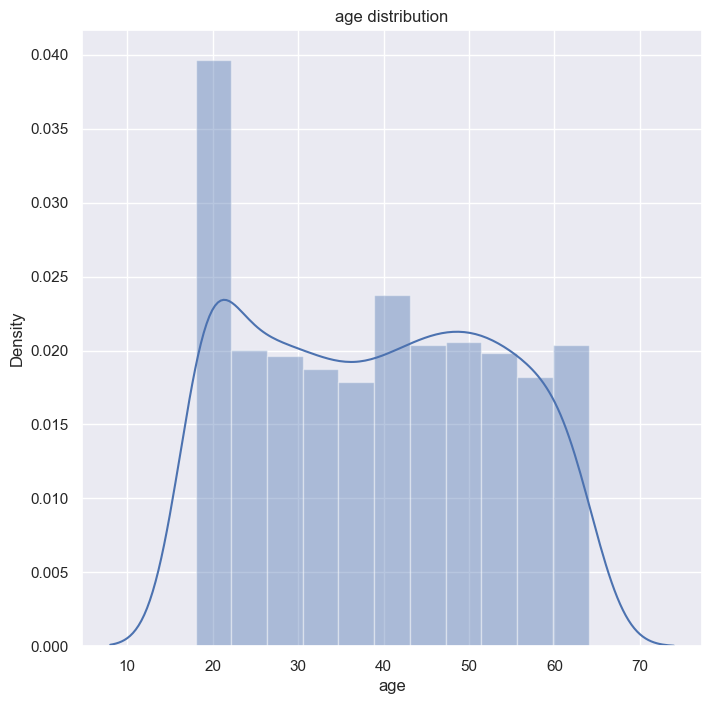

In [32]:
sns.set()
plt.figure(figsize=(8,8))
sns.distplot(df['age'])
plt.title("age distribution")
plt.show()

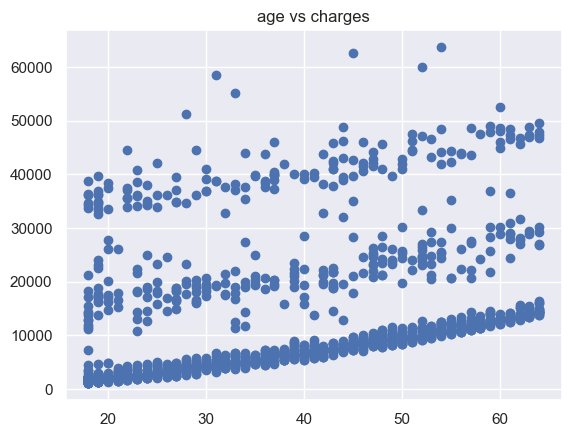

In [33]:
x=df['age']
# y=df["smoker"]=='yes'
y=df['charges']

# plt.plot(x,y)
plt.scatter(x,y)
# plt.title("age vs smoker")
plt.title("age vs charges")
plt.show()

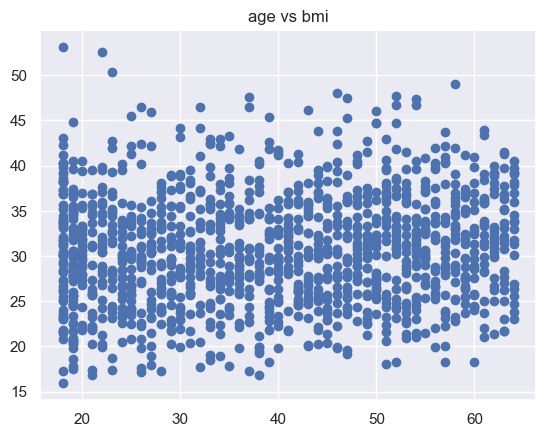

In [34]:
# x=df['age'][0:155]
# y=df["bmi"][0:155]
x=df['age']
y=df["bmi"]

# plt.plot(x,y)
plt.scatter(x,y)
plt.title("age vs bmi" )
plt.show()


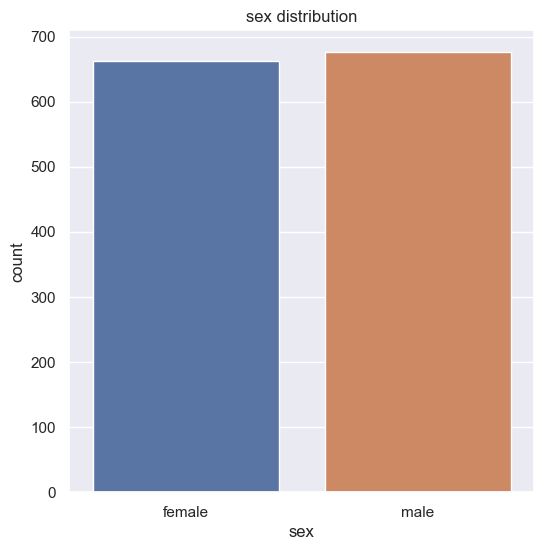

In [35]:
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=df)
plt.title("sex distribution")
plt.show()

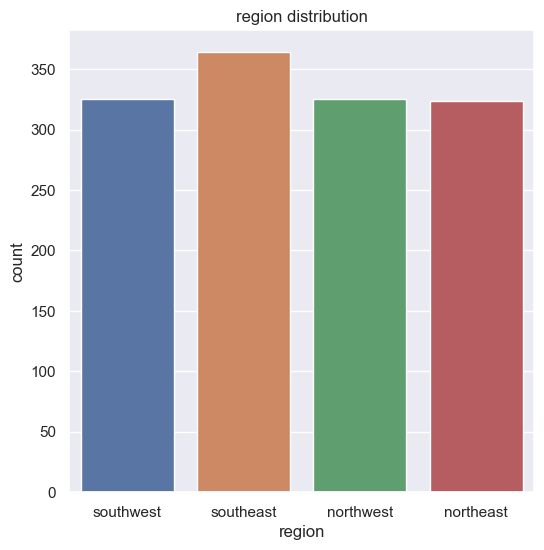

In [36]:
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=df)
plt.title("region distribution")
plt.show()

In [37]:
df["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [38]:
df["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

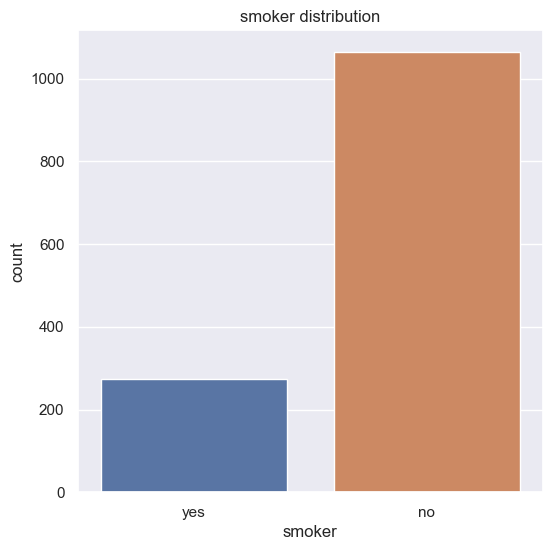

In [39]:
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=df)
plt.title("smoker distribution")
plt.show()

In [40]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_18800\4182678064.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bmi'])


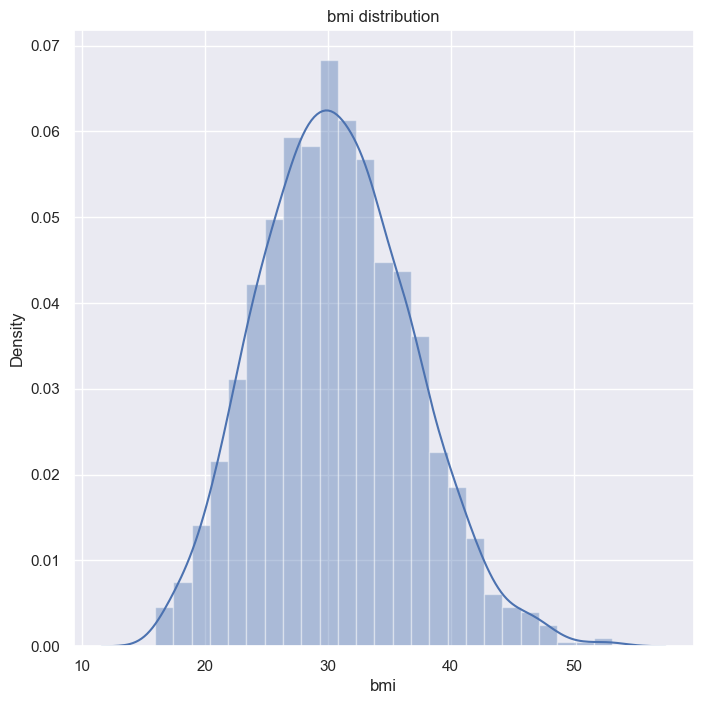

In [41]:
plt.figure(figsize=(8,8))
sns.distplot(df['bmi'])
plt.title("bmi distribution")
plt.show()

# normal bmi range 18.5 to 24.9

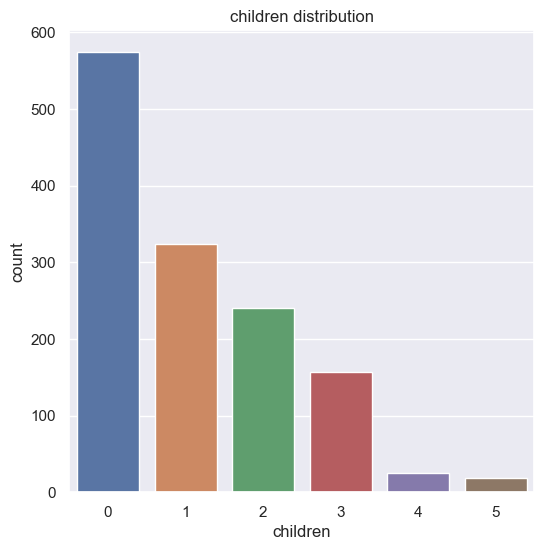

In [42]:
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=df)
plt.title("children distribution")
plt.show()

In [43]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [44]:
df.loc[(df["children"]==3) & (df['smoker']=='yes')].count()


age         39
sex         39
bmi         39
children    39
smoker      39
region      39
charges     39
dtype: int64

C:\Users\user\AppData\Local\Temp\ipykernel_18800\3715372490.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['charges'])


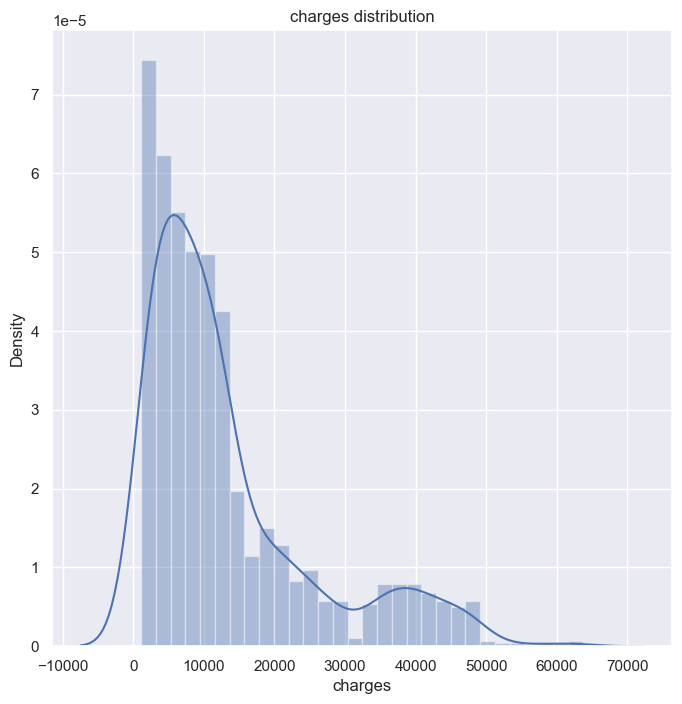

In [45]:
plt.figure(figsize=(8,8))
sns.distplot(df['charges'])
plt.title("charges distribution")
plt.show()

## data preprocessing 

as computer can't understand the text we change this categorical data('sex','region','smoker') to numerical value ------      known as encoding 

In [46]:
df.replace({'sex':{"male":0,"female":1}},inplace=True)

df.replace({'smoker':{"no":0,"yes":1}},inplace=True)

df.replace({'region':{"southeast":0,"southwest":1,"northeast":2,"northwest":3}},inplace=True)

In [47]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,0,1725.55230
2,28,0,33.000,3,0,0,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


In [48]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.204783,1.455904,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.130888,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,0.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,0.000000,1.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


In [49]:
#splitting the feature and the target

X=df[{'age','sex','bmi','children','smoker','region'}]
Y=df['charges']

C:\Users\user\AppData\Local\Temp\ipykernel_18800\765173011.py:3: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  X=df[{'age','sex','bmi','children','smoker','region'}]


In [50]:
print(X.head())

   children     bmi  sex  age  region  smoker
0         0  27.900    1   19       1       1
1         1  33.770    0   18       0       0
2         3  33.000    0   28       0       0
3         0  22.705    0   33       3       0
4         0  28.880    0   32       3       0


In [51]:
print(Y.head())

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64


In [52]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [53]:
X.shape

(1338, 6)

In [54]:
x_train.shape

(1070, 6)

# modeling 

In [55]:
# linear regression 

lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

# model evaluation

###  predicting on training data

In [56]:
train_result=lr.predict(x_train)

# r2 score to chexk for model 

r2_train=metrics.r2_score(y_train,train_result)

print("R squared value :" ,r2_train)

R squared value : 0.751505643411174


In [57]:
test_result=lr.predict(x_test)

# r2 score to chexk for model 

r2_test=metrics.r2_score(y_test,test_result)

print("R squared value :" ,r2_test)

R squared value : 0.7447273869684077


## building a predictive sysytem 

In [62]:
# input_data=(56,female,39.82,0,no,southeast)   #we took female as 1 and non smoker as=0 southeast as 0 so we need to replace this

input_data=(0,36.005,1,60,2,0)

to_array=np.asarray(input_data)

to_array_change_dim=to_array.reshape(1,-1)

prediction=lr.predict(to_array_change_dim)


print(prediction)
    

[14869.35897203]


C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [63]:
input_data=(0,26.22,0,25,2,0)

to_array=np.asarray(input_data)

to_array_change_dim=to_array.reshape(1,-1)

prediction=lr.predict(to_array_change_dim)


print(prediction)
    

[2808.687798]


C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
